In [1]:
import urllib.request
response = urllib.request.urlopen('https://www.spacex.com')
html = response.read()
print(html)

b'<!doctype html>\r\n<!--\r\n-- Space Exploration Technologies Corp.\r\n-- @version 1.0\r\n-- @date 06.02.2020\r\n-- @url https://spacex.com\r\n-->\r\n<html lang="en">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n\t<meta http-equiv="Content-Language" content="en">\r\n\t<meta name="SpaceX" />\r\n\t<meta name="keywords" content="space,spacex,aerospace,elon musk,mars,falcon 9,falcon heavy,dragon" />\r\n\t<meta name="description" content="SpaceX designs, manufactures and launches advanced rockets and spacecraft. The company was founded in 2002 to revolutionize space technology, with the ultimate goal of enabling people to live on other planets." />\r\n\t<meta property="og:locale" content="en_US"/>\r\n\t<meta property="og:type" content="website"/>\r\n\t<meta property="og:title" content="SpaceX"/>\r\n\t<meta property="og:description" content="SpaceX designs, manufactures and launches advanced rockets and spacecraft."/>\r\n\t<meta property="og:site_n

### Use BeautifulSoup to clean the grabbed text like 

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,"html5lib")

text = soup.get_text(strip=True)
print(text)

SpaceX@media (max-width: 700px) {
			#feature .background {
				background-position-x: right;
			}
		}SpaceX LogoFalcon 9Falcon HeavyDragonStarshipHuman SpaceflightRideshareSHOPFalcon 9Falcon HeavyDragonStarshipHuman SpaceflightRideshareMissionLaunchesCareersUpdatesShopRecent LaunchCRS-23 MissionREWATCHRecent LaunchTransporter-2 MissionREWATCHStarship to Land NASA Astronauts on the MoonLEARN MOREDRAGON DOCKING SIMULATORDragon is designed to autonomously dock and undock with the International Space Station. However, the crew can take manual control of the spacecraft if necessary.TRY NOWSpaceX © 2021TWITTERYOUTUBEINSTAGRAMFLICKRLINKEDINPRIVACY POLICY


### Clean text from the crawled web page

In [3]:
tokens = [t for t in text.split()]
print(tokens)

['SpaceX@media', '(max-width:', '700px)', '{', '#feature', '.background', '{', 'background-position-x:', 'right;', '}', '}SpaceX', 'LogoFalcon', '9Falcon', 'HeavyDragonStarshipHuman', 'SpaceflightRideshareSHOPFalcon', '9Falcon', 'HeavyDragonStarshipHuman', 'SpaceflightRideshareMissionLaunchesCareersUpdatesShopRecent', 'LaunchCRS-23', 'MissionREWATCHRecent', 'LaunchTransporter-2', 'MissionREWATCHStarship', 'to', 'Land', 'NASA', 'Astronauts', 'on', 'the', 'MoonLEARN', 'MOREDRAGON', 'DOCKING', 'SIMULATORDragon', 'is', 'designed', 'to', 'autonomously', 'dock', 'and', 'undock', 'with', 'the', 'International', 'Space', 'Station.', 'However,', 'the', 'crew', 'can', 'take', 'manual', 'control', 'of', 'the', 'spacecraft', 'if', 'necessary.TRY', 'NOWSpaceX', '©', '2021TWITTERYOUTUBEINSTAGRAMFLICKRLINKEDINPRIVACY', 'POLICY']


### Count word frequency

In [5]:
import nltk
freq = nltk.FreqDist(tokens)

for key,val in freq.items():

    print (str(key) + ':' + str(val))

SpaceX@media:1
(max-width::1
700px):1
{:2
#feature:1
.background:1
background-position-x::1
right;:1
}:1
}SpaceX:1
LogoFalcon:1
9Falcon:2
HeavyDragonStarshipHuman:2
SpaceflightRideshareSHOPFalcon:1
SpaceflightRideshareMissionLaunchesCareersUpdatesShopRecent:1
LaunchCRS-23:1
MissionREWATCHRecent:1
LaunchTransporter-2:1
MissionREWATCHStarship:1
to:2
Land:1
NASA:1
Astronauts:1
on:1
the:4
MoonLEARN:1
MOREDRAGON:1
DOCKING:1
SIMULATORDragon:1
is:1
designed:1
autonomously:1
dock:1
and:1
undock:1
with:1
International:1
Space:1
Station.:1
However,:1
crew:1
can:1
take:1
manual:1
control:1
of:1
spacecraft:1
if:1
necessary.TRY:1
NOWSpaceX:1
©:1
2021TWITTERYOUTUBEINSTAGRAMFLICKRLINKEDINPRIVACY:1
POLICY:1


### plot a graph for those tokens

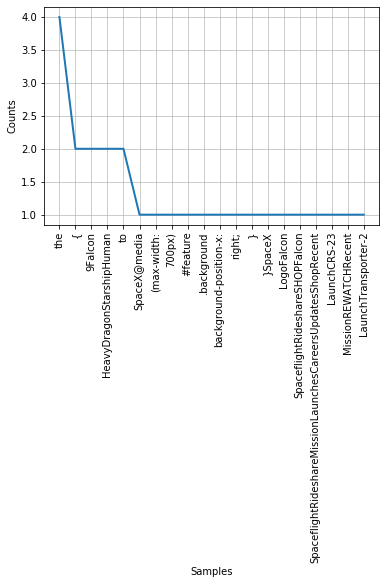

In [6]:
freq.plot(20, cumulative=False)

### Remove stop words using NLTK

In [7]:
from nltk.corpus import stopwords
clean_tokens = tokens[:]

sr = stopwords.words('english')

for token in tokens:

    if token in sr:
        clean_tokens.remove(token)
print(clean_tokens)

['SpaceX@media', '(max-width:', '700px)', '{', '#feature', '.background', '{', 'background-position-x:', 'right;', '}', '}SpaceX', 'LogoFalcon', '9Falcon', 'HeavyDragonStarshipHuman', 'SpaceflightRideshareSHOPFalcon', '9Falcon', 'HeavyDragonStarshipHuman', 'SpaceflightRideshareMissionLaunchesCareersUpdatesShopRecent', 'LaunchCRS-23', 'MissionREWATCHRecent', 'LaunchTransporter-2', 'MissionREWATCHStarship', 'Land', 'NASA', 'Astronauts', 'MoonLEARN', 'MOREDRAGON', 'DOCKING', 'SIMULATORDragon', 'designed', 'autonomously', 'dock', 'undock', 'International', 'Space', 'Station.', 'However,', 'crew', 'take', 'manual', 'control', 'spacecraft', 'necessary.TRY', 'NOWSpaceX', '©', '2021TWITTERYOUTUBEINSTAGRAMFLICKRLINKEDINPRIVACY', 'POLICY']


### Plot graph with stopwords

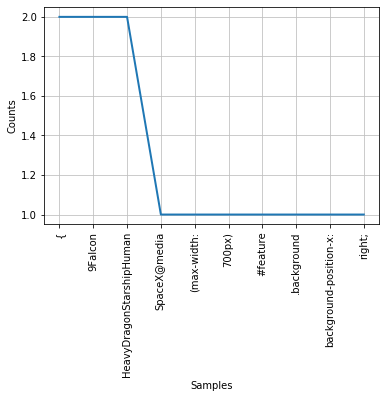

In [8]:
freq = nltk.FreqDist(clean_tokens)
freq.plot(10, cumulative=False)

In [14]:
print(freq)
# import matplotlib.pyplot as plt
# import numpy as np
# plt.hist(freq, bins = 10)

# plt.show()

<FreqDist with 44 samples and 47 outcomes>


### Created Bar graph

                                                    Frequency
Term                                                         
SpaceflightRideshareMissionLaunchesCareersUpdat...          1
LaunchCRS-23                                                1
MissionREWATCHRecent                                        1
LaunchTransporter-2                                         1
MissionREWATCHStarship                                      1
Land                                                        1
POLICY                                                      1
HeavyDragonStarshipHuman                                    2
{                                                           2
9Falcon                                                     2


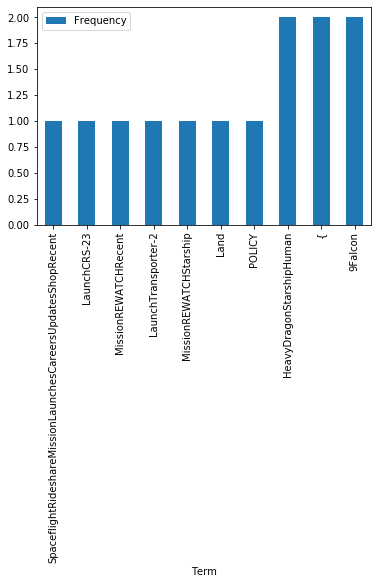

In [43]:
import pandas as pd
df_fdist = pd.DataFrame.from_dict(freq, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
# print(df_fdist)
df_fdist = df_fdist.sort_values(by=['Frequency'])
df_fdist=df_fdist[-10:]
print(df_fdist)
df_fdist.plot.bar()

In [42]:
'''Q1. Why we use stopwords? Why stopwords are not necessary for NLP frequency distribution.
=> Stopwrods are those words that are not giving any meaningful information. 
    frequency distribution, we don't need stopwords because we are talking about general ideas of text.
2.	Based on high frequency words what information you can extract from the graph?
=> We can get the idea of most frequent words and even can say that what's words are use more and less frequent
3.	Can you provide different visualization for frequency distribution? If yes, please perform. If no, why?
Yes, we can do bar chart and even i think we can perform others too.
For that we need to convert FreqDist to dataframe
'''

"Q1. Why we use stopwords? Why stopwords are not necessary for NLP frequency distribution.\n=> Stopwrods are those words that are not giving any meaningful information. \n    frequency distribution, we don't need stopwords because we are talking about general ideas of text.\n2.\tBased on high frequency words what information you can extract from the graph?\n=> We can get the idea of most frequent words and even can say that what's words are use more and less frequent\n3.\tCan you provide different visualization for frequency distribution? If yes, please perform. If no, why?\nYes, we can do bar chart and even i think we can perform others too.\nFor that we need to convert FreqDist to dataframe\n"